In [1]:
import numpy as np

In [2]:
def UCB(C,start,Optimum,Nt,totalTime,Bandits):
    totalTime+=1
    maxVal = -100
    index = -1
    for i in range(Bandits):
        temp = start[i] + C*((np.log(totalTime)/(Nt[i]+0.000001))**0.5)
#         print(temp)
        if(temp>maxVal):
            
            maxVal = temp
#             print(maxVal)
            index = i
    reward = Optimum[index]+np.random.randn(2)[0]
    start[index]=(start[index]*Nt[index]+reward)/(Nt[index]+1)
    Nt[index]+=1
    
    return start,Nt,totalTime,reward,index


In [3]:
def EGreedy(e,start,optimum,Nt,Bandits,ConstantStep=False,alpha=None):
    p1 = np.random.rand()
    reward = 0
    if(p1<(1-e)):
#         print(Nt)
        maxVal = -100
        index = -1
        for i in range(Bandits):
            temp = start[i]
            if(temp>maxVal):
                maxVal = temp
                index = i
        reward = optimum[index]+np.random.randn(2)[0]
        if(ConstantStep==False):
            start[index] = (start[index]*Nt[index]+reward)/(Nt[index]+1)
        else:
            start[index] = (1-alpha)*start[index]+alpha*reward
#             print(alpha)
        Nt[index]+=1
    else:
        index = np.random.randint(Bandits)
#         print(index)
        reward = optimum[index]+np.random.randn(2)[0]
        if(ConstantStep==False):
            start[index] = (start[index]*Nt[index]+reward)/(Nt[index]+1)
        else:
            start[index] = (1-alpha)*start[index]+alpha*reward
        Nt[index]+=1
    
    return start,Nt,reward,index

In [4]:
# # For Indivisual Generation of e
# np.random.seed(0)
# Bandits = 10
# e=0.1

# E_Reward = np.zeros(1001)
# # print(start)
# # print(Nt)
# # print(Time)
# for j in range(2000):
#     Optimum = np.random.randn(Bandits)
#     start = np.random.randn(Bandits)*0.0001
#     Nt = np.zeros(Bandits)
#     Time = 0
#     for i in range(1000):
#         start,Nt,CurrReward = EGreedy(e,start,Optimum,Nt,Bandits)
#         Time+=1
# #         print(Time)
#         E_Reward[Time]+=CurrReward

# E_Reward/=2000
# E_Reward


In [5]:
# from matplotlib import pyplot as plt
# print(np.shape(E_Reward))
# arr = range(0,1001)
# np.shape(arr)
# plt.plot(arr,E_Reward)
# plt.show()

In [6]:
def BestAction(Optimum):
    index = -1
    maxV = -100
    for i in range(len(Optimum)):
        temp = Optimum[i]
        if(temp>maxV):
            maxV = temp
            index = i
    return index

In [14]:
np.random.seed(0)
Bandits = 10
C=2
e=0.1
alpha = 0.1
Optimistic = 5
StepWiseAverage = np.zeros(1001)
E_Reward = np.zeros(1001)
O_Reward = np.zeros(1001)

for j in range(2000):
    Optimum = np.random.randn(Bandits)
    BestAct = BestAction(Optimum)
    start1 = np.random.randn(Bandits)*0.0001
    start2 = np.random.randn(Bandits)*0.0001
    start3 = np.random.randn(Bandits)*0.0001+Optimistic
    Nt1 = np.zeros(Bandits)
    Nt2 = np.zeros(Bandits)
    Nt3 = np.zeros(Bandits)
    Time = 0
    for i in range(1000):
        start1,Nt1,Time,CurrReward,ind = UCB(C,start1,Optimum,Nt1,Time,Bandits)
        if(ind==BestAct):
            StepWiseAverage[Time]+=1
        start2,Nt2,CurrReward,ind = EGreedy(e,start2,Optimum,Nt2,Bandits)
        if(ind==BestAct):
            E_Reward[Time]+=1
        start3,Nt3,CurrReward,ind = EGreedy(0,start3,Optimum,Nt3,Bandits,ConstantStep=True,alpha=alpha)
        if(ind==BestAct):
            O_Reward[Time]+=1
        

StepWiseAverage/=2000
StepWiseAverage
E_Reward/=2000
E_Reward
O_Reward/=2000
O_Reward


array([0.    , 0.101 , 0.0855, ..., 0.8675, 0.8675, 0.8685])

In [15]:
# # For Indivisual Generation of C
# np.random.seed(0)
# Bandits = 10
# C=2

# StepWiseAverage = np.zeros(1001)
# # print(start)
# # print(Nt)
# # print(Time)
# for j in range(2000):
#     Optimum = np.random.randn(Bandits)
#     start = np.random.randn(Bandits)*0.0001
#     Nt = np.zeros(Bandits)
#     Time = 0
#     for i in range(1000):
#         start,Nt,Time,CurrReward = UCB(C,start,Optimum,Nt,Time,Bandits)
#         StepWiseAverage[Time]+=CurrReward

# StepWiseAverage/=2000
# StepWiseAverage


(1001,)
(1001,)


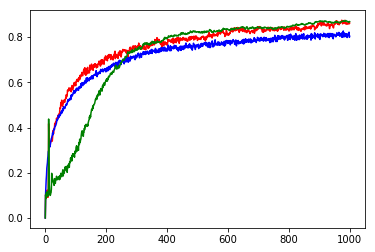

In [17]:
from matplotlib import pyplot as plt
print(np.shape(StepWiseAverage))
print(np.shape(E_Reward))
arr = range(0,1001)
np.shape(arr)
plt.plot(arr,StepWiseAverage,color='Red')
plt.plot(arr,E_Reward,color='Blue')
plt.plot(arr,O_Reward,color='Green')
plt.show()

In [ ]:
range(0,10)[2]